## Generating one dimensional cluster states

In this notebook we generate one dimensional cluster states with the sequential emission protocol

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.sparse as sps

from qutip import *

import cirq

import qutrit_utils
import graph_state_gen_circuits as gsg

In [3]:
### system parameters
qus = [2,3,4,5,6,7,8,9,10,11,12]

waittimes = [0.125, 0.125, 0.125, 0.075, 0.205] # T_h, T_pief, T_cnot, T_wait, T_swap

coherence_times1 = [27, 22, 16, 12]

nparams = [0.01, 0.0]

In [4]:
##-- initialize the simulators
simulator = cirq.Simulator()
dsim = cirq.DensityMatrixSimulator()

In [5]:
#gsg.ideal_cluster_state_1D(4)

In [6]:
#gsg.noisy_cluster_state_1D(2, waittimes, coherence_times1, nparams)

## generating the states

In [7]:
%%time
### the ideal states
noiseless_states = []

for qu in qus:
    #- run the circuit
    ideal_state = simulator.simulate(gsg.ideal_cluster_state_1D(qu)).final_state_vector
    
    #- ideal state in csr form
    ideal_rho = sps.csr_matrix(np.outer(np.conj(ideal_state), ideal_state))
    
    #- ideal state as qutip object
    irho = Qobj(ideal_rho, dims = [[3] + [2]*qu, [3] + [2]*qu])
    
    #- reduced state of the qubit register (trace out the storages)
    irho_qubits = ptrace(irho, list(range(1, qu+1)))
    
    noiseless_states.append(irho_qubits)
    
    #deco_state = dsim.simulate(gsg.noisy_cluster_state_1D(qu, waittimes, coherence_times1, [0,0])).final_density_matrix
    #fide_deco = np.dot(np.conj(ideal_state), np.dot(deco_state, ideal_state))
    #fides_deco.append(fide_deco.real)
    
    print("Computation for %d qubits, done -->>" % qu)
#

Computation for 2 qubits, done -->>
Computation for 3 qubits, done -->>
Computation for 4 qubits, done -->>
Computation for 5 qubits, done -->>
Computation for 6 qubits, done -->>
Computation for 7 qubits, done -->>
Computation for 8 qubits, done -->>
Computation for 9 qubits, done -->>
Computation for 10 qubits, done -->>
Computation for 11 qubits, done -->>
Computation for 12 qubits, done -->>
CPU times: user 3.6 s, sys: 1.21 s, total: 4.81 s
Wall time: 5.07 s


In [8]:
%%time
### the decoherence limited states
deco_states = []

for qu in qus:
    #- run the circuit
    deco_state = dsim.simulate(gsg.noisy_cluster_state_1D(qu, waittimes, coherence_times1, [0,0])).final_density_matrix
    
    #- deco state in csr form
    deco_rho = sps.csr_matrix(deco_state)
    
    #- ideal state as qutip object
    drho = Qobj(deco_rho, dims = [[3] + [2]*qu, [3] + [2]*qu])
    
    #- reduced state of the qubit register (trace out the storages)
    drho_qubits = ptrace(drho, list(range(1, qu+1)))
    
    deco_states.append(drho_qubits)
    print("Computation for %d qubits, done -->>" % qu)
#

Computation for 2 qubits, done -->>
Computation for 3 qubits, done -->>
Computation for 4 qubits, done -->>
Computation for 5 qubits, done -->>
Computation for 6 qubits, done -->>
Computation for 7 qubits, done -->>
Computation for 8 qubits, done -->>
Computation for 9 qubits, done -->>
Computation for 10 qubits, done -->>
Computation for 11 qubits, done -->>
Computation for 12 qubits, done -->>
CPU times: user 1min 55s, sys: 1min 59s, total: 3min 55s
Wall time: 3min 23s


In [9]:
%%time
### the noisy states
noisy_states = []

for qu in qus:
    #- run the circuit
    noisy_state = dsim.simulate(gsg.noisy_cluster_state_1D(qu, waittimes, coherence_times1, nparams)).final_density_matrix
    
    #- deco state in csr form
    noisy_rho = sps.csr_matrix(noisy_state)
    
    #- ideal state as qutip object
    nrho = Qobj(noisy_rho, dims = [[3] + [2]*qu, [3] + [2]*qu])
    
    #- reduced state of the qubit register (trace out the storages)
    nrho_qubits = ptrace(nrho, list(range(1, qu+1)))
    
    noisy_states.append(nrho_qubits)
    
    print("Computation for %d qubits, done -->>" % qu)
#

Computation for 2 qubits, done -->>
Computation for 3 qubits, done -->>
Computation for 4 qubits, done -->>
Computation for 5 qubits, done -->>
Computation for 6 qubits, done -->>
Computation for 7 qubits, done -->>
Computation for 8 qubits, done -->>
Computation for 9 qubits, done -->>
Computation for 10 qubits, done -->>
Computation for 11 qubits, done -->>
Computation for 12 qubits, done -->>
CPU times: user 1min 58s, sys: 2min 5s, total: 4min 3s
Wall time: 2min 41s


### Fidelities

In [10]:
fides_deco = []
fides_noisy = []

for qq in range(len(qus)-2):
    fdeco = fidelity(deco_states[qq], noiseless_states[qq])**2
    ndeco = fidelity(noisy_states[qq], noiseless_states[qq])**2
    
    fides_deco.append(fdeco)
    fides_noisy.append(ndeco)
    
    print(qus[qq], fdeco, ndeco)
#

2 0.9786733570257156 0.963999722147395
3 0.9617318309059724 0.9236480033527816
4 0.9450707607397323 0.8878426709979317
5 0.928698986526345 0.8549470489831368
6 0.9126109963358476 0.8231982315491142
7 0.8968018138961315 0.7928369568338209
8 0.8812667020364674 0.763491980242779
9 0.8660011856528137 0.7353057409939733
10 0.8510011235630761 0.7081451975952309


## noisy state fidelities

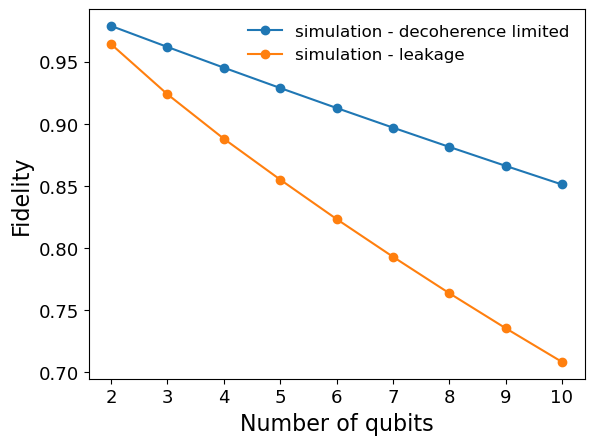

In [14]:
plt.plot(qus[:-2], fides_deco, "o-", label = "simulation - decoherence limited")
plt.plot(qus[:-2], fides_noisy, "o-", label = "simulation - leakage")

plt.legend(loc = "upper right", fontsize = 12, frameon = False)
plt.xlabel("Number of qubits", fontsize = 16)
plt.ylabel("Fidelity", fontsize = 16)
plt.tick_params(axis = "both", labelsize = 13)
plt.show()

## Exporting the states

In [12]:
### path
#patho = "/Users/munm2002/Documents/projects/graph_states_for_ent_witness/data_states/cluster_state_1D/"

In [13]:
# ### save the states
# for ii in range(len(qus)):

#     #qsave(noisy_states[ii], patho+"cluster_state_1D_%dqubits.qu" % qus[ii])
#     qsave(noiseless_states[ii], patho+"ideal_cluster_state_1D_%dqubits.qu" % qus[ii])
    
#     print("Size %d, completed -->>" % (qus[ii]))
# #